In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
import scipy.io as sio

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [0]:
train_data = sio.loadmat('/content/drive/My Drive/Data/train_32x32.mat')
test_data = sio.loadmat('/content/drive/My Drive/Data/test_32x32.mat')


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


In [11]:
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]
print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)



In [12]:
y_train.shape,y_test.shape
num_images = X_train.shape[0] + X_test.shape[0]
print("Total Number of Images", num_images)


Total Number of Images 99289


In [0]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

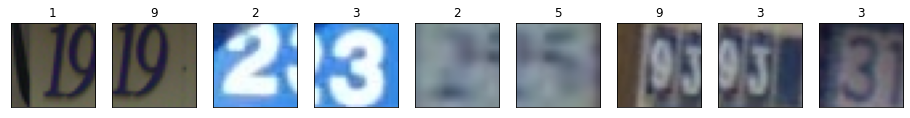

In [14]:
plot_images(X_train, y_train,1,9)


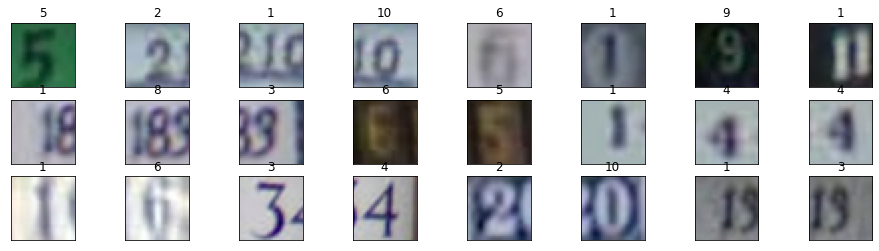

In [15]:
plot_images(X_test, y_test, 3, 8)

In [16]:
print(np.unique(y_train))
print(np.unique(y_test))

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]


In [17]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((73257, 32, 32, 3), (73257,), (26032, 32, 32, 3), (26032,))

In [18]:
print("Training Set", X_train.shape)

print("Test Set", X_test.shape)
print('')

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)



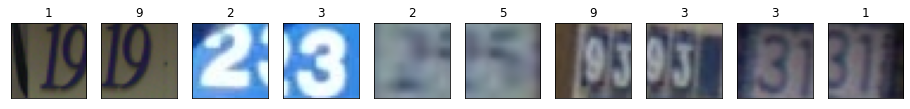

In [19]:
plot_images(X_train, y_train, 1, 10)

In [0]:
#normalization
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [0]:
SUBTRACT_PIXEL_MEAN = True
if SUBTRACT_PIXEL_MEAN:
    X_train_mean = np.mean(X_train, axis=0)
    X_train -= X_train_mean
    X_test -= X_train_mean

In [0]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0


In [23]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization,Flatten,Conv2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [24]:
from keras.utils import to_categorical

print(y_train[:100])


[1 9 2 3 2 5 9 3 3 1 3 3 2 8 7 4 4 1 2 8 1 6 2 3 6 3 4 2 5 8 1 6 2 3 7 9 5
 3 2 2 2 6 2 2 5 1 5 4 7 8 9 6 0 1 2 4 5 6 5 2 1 3 2 1 4 6 3 8 4 3 1 4 4 2
 6 4 4 1 1 1 7 3 1 2 0 4 2 2 5 1 2 9 2 0 4 1 0 3 2 7]


In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[:4]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((73257, 32, 32, 3), (73257, 10), (26032, 32, 32, 3), (26032, 10))

In [27]:
X_train[0].shape, (y_train[0].shape)

((32, 32, 3), (10,))

In [28]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(Flatten())          #flatten since too many dimensions, we only want a classification output
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(len(y_train[0]), activation='softmax'))       #output a softmax to squash the matrix into output probabilities

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 256)         819456    
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [29]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
t1 = datetime.now()
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Data/best_weights_cnn_relu.hdf5", verbose=0, save_best_only=True) # save best model
history = model.fit(X_train, y_train,batch_size=128, validation_data= (X_test, y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
model.load_weights('/content/drive/My Drive/Data/best_weights_cnn_relu.hdf5') # load weights from best model

train_time = datetime.now() - t1

Train on 73257 samples, validate on 26032 samples
Epoch 1/1000
 - 13s - loss: 0.6699 - accuracy: 0.7949 - val_loss: 0.4590 - val_accuracy: 0.8650
Epoch 2/1000
 - 6s - loss: 0.3442 - accuracy: 0.8989 - val_loss: 0.3600 - val_accuracy: 0.8952
Epoch 3/1000
 - 6s - loss: 0.2745 - accuracy: 0.9193 - val_loss: 0.3697 - val_accuracy: 0.8961
Epoch 4/1000
 - 6s - loss: 0.2271 - accuracy: 0.9335 - val_loss: 0.3365 - val_accuracy: 0.9091
Epoch 5/1000
 - 6s - loss: 0.1851 - accuracy: 0.9459 - val_loss: 0.3388 - val_accuracy: 0.9084
Epoch 6/1000
 - 6s - loss: 0.1581 - accuracy: 0.9528 - val_loss: 0.4002 - val_accuracy: 0.8972
Epoch 7/1000
 - 6s - loss: 0.1302 - accuracy: 0.9595 - val_loss: 0.4490 - val_accuracy: 0.9019
Epoch 00007: early stopping


In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0]) #loss
print('Test accuracy:', score[1])

Test score: 0.33654231195050144
Test accuracy: 0.9090734720230103


In [31]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)
y_test = np.argmax(y_test, axis = 1)
print(y_test)

[5 2 1 ... 7 6 7]
[5 2 1 ... 7 6 7]


In [32]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9090734480639213

In [33]:
score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision-score: {}".format(score))

Precision-score: 0.9097896449032303


In [34]:
score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall-score: {}".format(score))

Recall-score: 0.9090734480639213


In [35]:
score = metrics.f1_score(y_test,  y_pred, average= "weighted")
print("F1-score: {}".format(score))


F1-score: 0.9090934968990062


In [0]:
classification = metrics.classification_report(y_test, y_pred)
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
print(confusion_matrix)
print(classification)
print(accuracy)


<function confusion_matrix at 0x7f383934a620>
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1744
           1       0.94      0.95      0.94      5099
           2       0.95      0.92      0.93      4149
           3       0.91      0.85      0.88      2882
           4       0.89      0.94      0.91      2523
           5       0.93      0.89      0.91      2384
           6       0.86      0.90      0.88      1977
           7       0.90      0.92      0.91      2019
           8       0.87      0.85      0.86      1660
           9       0.83      0.89      0.86      1595

    accuracy                           0.91     26032
   macro avg       0.90      0.90      0.90     26032
weighted avg       0.91      0.91      0.91     26032

0.9090734480639213


In [0]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[1572   18   12    3   15    7   47   11   25   34]
 [  45 4845   27   13   75    9    7   46   23    9]
 [   6   29 3821   63   55   11   18   98   31   17]
 [   6   64   49 2460   29   72   24   19   38  121]
 [  11   56   20   15 2364    2   15    8   16   16]
 [   6   18   17   56   24 2131   75   12   23   22]
 [  20   21    5   15   36   29 1785   10   41   15]
 [   3   81   30   20    8    3    2 1859    2   11]
 [  15   11   12   40   25   13   95    5 1406   38]
 [  30   15   46   19   17   17    8    5   16 1422]]
Plotting confusion matrix


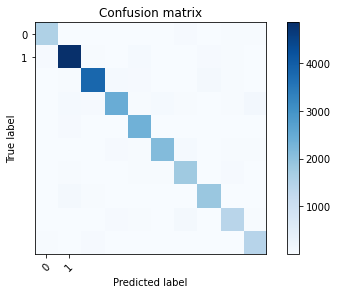

In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, [0, 1])
plt.show()

In [0]:
prediction_array = model.predict(X_test)
predicted_class = np.argmax(prediction_array, axis=1)


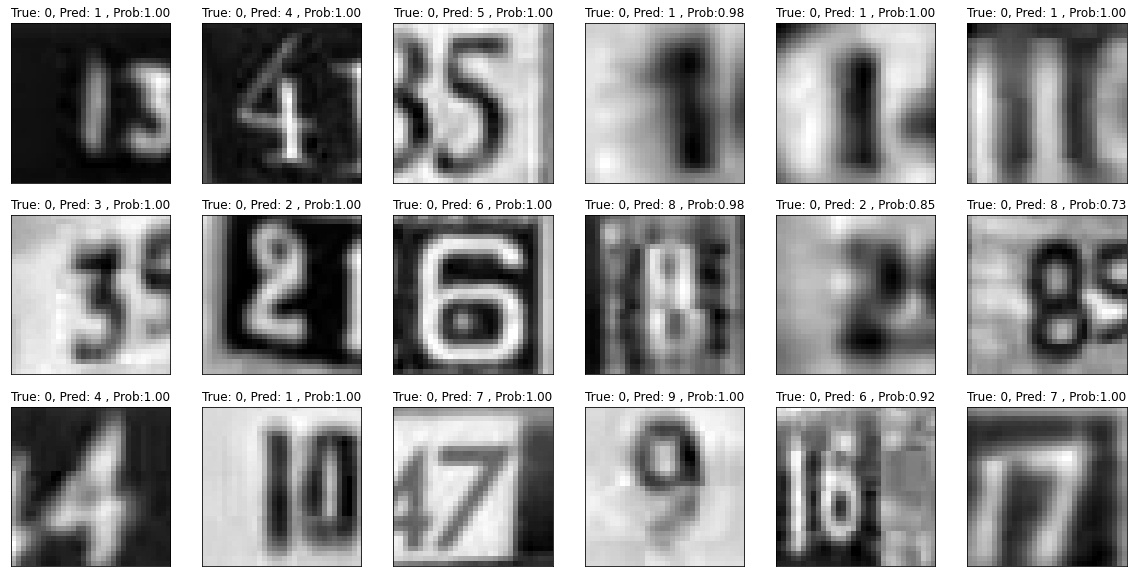

In [41]:
def plot_predicted_label(images, nrows, ncols, cls_true, cls_pred,prediction_array):
    fig, axes = plt.subplots(nrows, ncols,figsize=(20, 10))
    
    rs = np.random.choice(images.shape[0], nrows*ncols)
    
    for i, ax in zip(rs, axes.flat):
        prob = round(prediction_array[i][cls_pred[i]],2)
        title = 'True: %s, Pred: %s , Prob:%0.2f' % (np.argmax(cls_true[i]),cls_pred[i],prob)
        ax.imshow(images[i,:,:,0], cmap='binary')
        ax.set_title(title)
         
        ax.set_xticks([])
        ax.set_yticks([])


# ploat image with predicted and actual value
num_rows = 3
num_cols = 6
plot_predicted_label(X_test,num_rows, num_cols, y_test,predicted_class,prediction_array);